In [2]:
TF_DIR = "/home/input/openpose_tryout/tf-pose-estimation"

In [3]:
%cd "$TF_DIR"

/home/input/openpose_tryout/tf-pose-estimation


In [4]:
# 標準使用ライブラリー
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
import gc
import os
import shutil

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import json
import datetime
import math
plt.style.use('dark_background')

from pathlib import Path

import logging
import ffmpeg
import re
import sys
import time
import cv2

from pylab import rcParams

from tf_pose import common
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path, model_wh
%matplotlib


Using matplotlib backend: agg


In [5]:
MOVIE_DIR = Path("/home/input/openpose_tryout/movies/")
MOVIE2IMG_DIR = Path( "/home/input/openpose_tryout/images_output/")
MOVIE2IMG_LOCAS_DIR = Path( "/home/input/openpose_tryout/images_locas_output/")
MOVIE_OUTPUT_LOCAS_DIR =  Path("/home/input/openpose_tryout/movies_output_locas/")

In [6]:
##################################
#  独自ライブラリー： mshow
# (複数に対応したノートブック上画像表示)
##################################
import cv2;import numpy as np;import matplotlib as mpl;import matplotlib.pyplot as plt
%matplotlib inline
def mshow(img1=None, img2=None, img3=None, img4=None, img5=None, *, img_list = []):

    imgs = list(filter( lambda x: x is not None, [img1, img2, img3, img4, img5])) 
    imgs.extend(img_list)
    
    if len(imgs) == 1:
        # 一枚のとき
        imgs[0] = imgs[0].astype(np.uint8)
        im4p = cv2.cvtColor(imgs[0], cv2.COLOR_BGR2RGB)
        plt.imshow(im4p)

    elif len(imgs) < 10:
        # 複数枚のとき。横に並べていく
        plt.figure(figsize=(len(imgs)*4, len(imgs)*4))
        fig_exh_base = 100+len(imgs)*10
        for idx, tmp_img in enumerate(imgs):
            tmp_img = tmp_img.astype(np.uint8)
            tmp_im4p = cv2.cvtColor(tmp_img, cv2.COLOR_BGR2RGB)
            
            plt.subplot(fig_exh_base+idx+1)
            plt.imshow(tmp_im4p)
        
    else :
        plt.figure(figsize=(4*4, 4*4))
        for i in range(5):
            for j in range(5):
                
                if len(imgs) < 5*i+j+1:
                    break
                tmp_img = imgs[5*i+j].astype(np.uint8)
                tmp_im4p = cv2.cvtColor(tmp_img, cv2.COLOR_BGR2RGB)
                
                
                plt.subplot2grid((5,5), (i,j))
                plt.imshow(tmp_im4p)
        
        
        

In [7]:
stream = ffmpeg.input(str(MOVIE_DIR) + "/moriwaki_720.mp4")

In [8]:
tmp_dir =  "./tmp_img"
os.path.exists(tmp_dir)

True

In [9]:
###########################
# 動画読み込みチェック
###########################
import cv2;
def checkMoviePerSec ( stream , movie_duration) : 
    tmp_dir =  Path("./tmp_img") # 画像を仮保存する

    # 存在チェック、中の画像を一度空に
    if not os.path.exists(str(tmp_dir)):
        os.mkdir(str(tmp_dir))
    for f in tmp_dir.glob("*.jpg"):
        f.unlink()

    # 動画の尺。25秒以上のものは、25秒まで。 
    check_duration = movie_duration if movie_duration < 25 else 25
    
    # 1秒ずつ、そのタイミングの画像を保存
    for sec in range(1, check_duration):
        ffmpeg.output(stream, str(tmp_dir)+"/" + str(sec)  +".jpg", ss=sec, vframes=1, f='image2').run()

    imgs = [] #画像をいれるリスト
    for idx in range(1, check_duration):
        tmp_img = cv2.imread(str(tmp_dir) + "/" +str(idx)+".jpg" )
        imgs.append( tmp_img   )
    
    # open cvで読み込んだ画像を並べて表示
    mshow(img_list = imgs)
    return imgs


In [10]:
probe = ffmpeg.probe(str(MOVIE_DIR) + "/moriwaki_360.mp4")
movie_duration = math.floor(float(probe['streams'][0]["duration"]))

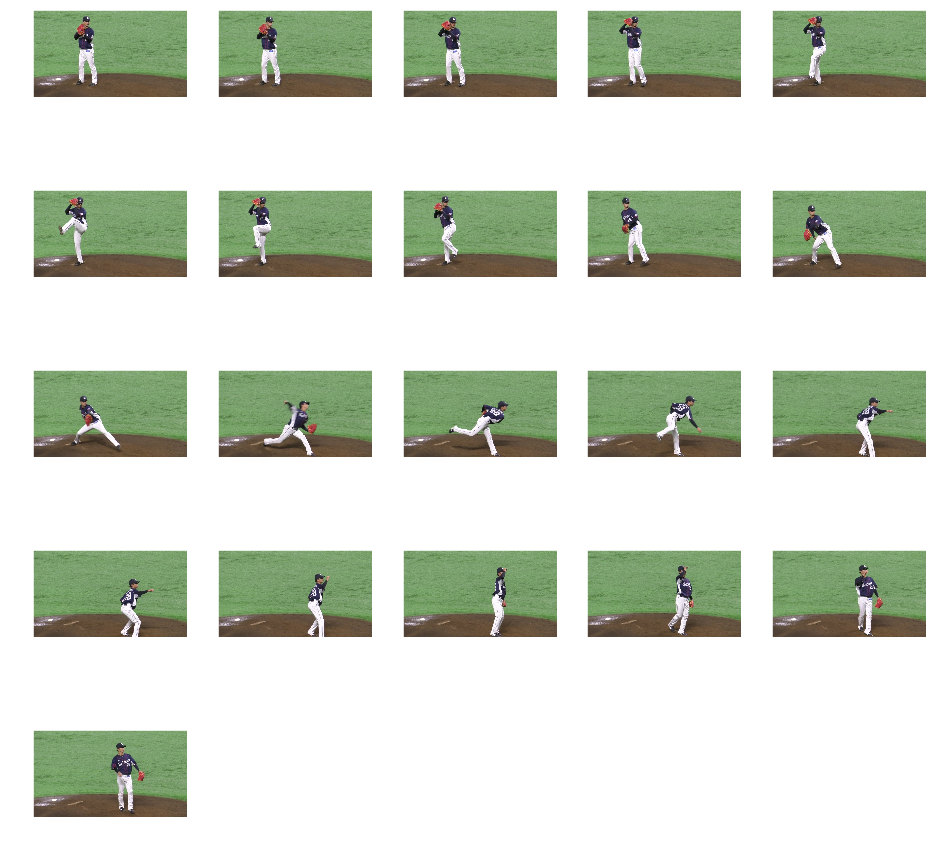

In [11]:
imgs =checkMoviePerSec(stream, movie_duration)

In [12]:
# 画像を空にする
for f in MOVIE2IMG_DIR.glob("*.jpg"):
    f.unlink()

In [13]:
stream.output(
    filename=str(MOVIE2IMG_DIR / "%06d.jpg"), ss=0, r=30000/1001, start_number=000000)\
    .run()


(None, None)

In [14]:
# この辺のパラメータは理解できてない
resize='0x0'
model = "cmu"
resize_out_ratio=4.0

# ここも良く分からない
w, h = model_wh(resize)
if w == 0 or h == 0:
    e = TfPoseEstimator(get_graph_path(model), target_size=(432, 368))
else:
    e = TfPoseEstimator(get_graph_path(model), target_size=(w, h))

[2020-08-19 03:23:40,786] [TfPoseEstimator] [INFO] loading graph from /home/input/openpose_tryout/tf-pose-estimation/models/graph/cmu/graph_opt.pb(default size=432x368)


TfPoseEstimator/Openpose/concat_stage7/axis
TfPoseEstimator/Mconv7_stage6_L2/biases
TfPoseEstimator/Mconv7_stage6_L2/weights
TfPoseEstimator/Mconv6_stage6_L2/biases
TfPoseEstimator/Mconv6_stage6_L2/weights
TfPoseEstimator/Mconv5_stage6_L2/biases
TfPoseEstimator/Mconv5_stage6_L2/weights
TfPoseEstimator/Mconv4_stage6_L2/biases
TfPoseEstimator/Mconv4_stage6_L2/weights
TfPoseEstimator/Mconv3_stage6_L2/biases
TfPoseEstimator/Mconv3_stage6_L2/weights
TfPoseEstimator/Mconv2_stage6_L2/biases
TfPoseEstimator/Mconv2_stage6_L2/weights
TfPoseEstimator/Mconv1_stage6_L2/biases
TfPoseEstimator/Mconv1_stage6_L2/weights
TfPoseEstimator/Mconv7_stage6_L1/biases
TfPoseEstimator/Mconv7_stage6_L1/weights
TfPoseEstimator/Mconv6_stage6_L1/biases
TfPoseEstimator/Mconv6_stage6_L1/weights
TfPoseEstimator/Mconv5_stage6_L1/biases
TfPoseEstimator/Mconv5_stage6_L1/weights
TfPoseEstimator/Mconv4_stage6_L1/biases
TfPoseEstimator/Mconv4_stage6_L1/weights
TfPoseEstimator/Mconv3_stage6_L1/biases
TfPoseEstimator/Mconv3_st

In [15]:
files = sorted(MOVIE2IMG_DIR.glob('*.jpg'))

In [16]:
# 画像を空にする
for f in MOVIE2IMG_LOCAS_DIR.glob("*.jpg"):
    f.unlink()

In [17]:
RightHandIdx = 4
test_imgs = []
right_hand_pre_pos = (168, 70)
right_hand_poses = []

for file_idx, file in enumerate( files):
    # 元画像を1枚ずつ読み込み
    tmp_img = cv2.imread(str(file))
    img_h, img_w = tmp_img.shape[:2]
    
    # 実行本体 humansに推定結果が返る
    humans = e.inference(tmp_img, resize_to_default=(w > 0 and h > 0), upsample_size=resize_out_ratio)
    # 人の線の描画
    #tmp_img_draw = TfPoseEstimator.draw_humans(tmp_img, humans, imgcopy=True)

    # 右手のポジションを取得 4が右手
    if len(humans)>0:
        if RightHandIdx in humans[0].body_parts.keys():
            right_hand_rel = humans[0].body_parts[4]
            right_hand_pos = (int( right_hand_rel.x * img_w + 0.5),   int(right_hand_rel.y * img_h + 0.5))

    right_hand_poses.append(right_hand_pos)
    if file_idx % 10 ==0: print(file_idx, "..now", end='###')
#     if file_idx > 300:
#         break
        
#     centers = {}
#     for i in range(common.CocoPart.Background.value):
#         if i not in humans[0].body_parts.keys():
#             continue
#         body_part = humans[0].body_parts[i]
#         center = (int(body_part.x * img_w + 0.5), int(body_part.y * img_h + 0.5))
#         centers[i] = center


0 ..now
10 ..now
20 ..now
30 ..now
40 ..now
50 ..now
60 ..now
70 ..now
80 ..now
90 ..now
100 ..now
110 ..now
120 ..now
130 ..now
140 ..now
150 ..now
160 ..now
170 ..now
180 ..now
190 ..now
200 ..now
210 ..now
220 ..now
230 ..now
240 ..now
250 ..now
260 ..now
270 ..now
280 ..now
290 ..now
300 ..now
310 ..now
320 ..now
330 ..now
340 ..now
350 ..now
360 ..now
370 ..now
380 ..now
390 ..now
400 ..now
410 ..now
420 ..now
430 ..now
440 ..now
450 ..now
460 ..now
470 ..now
480 ..now
490 ..now
500 ..now
510 ..now
520 ..now
530 ..now
540 ..now
550 ..now
560 ..now
570 ..now
580 ..now
590 ..now
600 ..now
610 ..now
620 ..now
630 ..now
640 ..now
650 ..now
660 ..now


In [18]:
for file_idx, file in enumerate( files):
    tmp_img = cv2.imread(str(file))
    for i in range(file_idx-1):
        if i == 0:continue
        
        tmp_img_locas = cv2.line(tmp_img, right_hand_poses[i] , right_hand_poses[i-1] , (0, 0, 255), thickness=2, lineType=cv2.LINE_8, shift=0)
        test_imgs.append(tmp_img_locas)
        cv2.imwrite(str(MOVIE2IMG_LOCAS_DIR / "{:06d}.jpg".format(file_idx) ), tmp_img_locas)
#     if file_idx > 300:
#         break

In [19]:
# 動画フォルダを空にする
for f in MOVIE_OUTPUT_LOCAS_DIR.glob("*.mp4"):
    f.unlink()

In [20]:

# ffmpegの仕様で、連番の画像を以下のように指定する。フレームレートは、29.97fpsのこと
jpg = ffmpeg.input(str(MOVIE2IMG_LOCAS_DIR/ "%06d.jpg"), framerate=30000/1001)

# ffmpeg-pythonは普通にかくと、エラーやログが見えないので注意。
try:
    message = ffmpeg.output(
        jpg,
#         mp3,
        filename=str(MOVIE_OUTPUT_LOCAS_DIR/"result.mp4"),
        vcodec='libx264', 
        acodec='aac',
        strict='experimental',
        ab=192000,
        ac=2,
        ar=48000,
        pix_fmt='yuv420p'
        ) \
        .run(capture_stdout=True, capture_stderr=True)
except ffmpeg.Error as e:
    print('stdout:', e.stdout.decode('utf8'))
    print('stderr:', e.stderr.decode('utf8'))
    raise e

print('stdout:', message) 


stdout: (b'', b"ffmpeg version 4.1.3 Copyright (c) 2000-2019 the FFmpeg developers\n  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)\n  configuration: --prefix=/opt/conda --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1556785800657/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-libx264 --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame\n  libavutil      56. 22.100 / 56. 22.100\n  libavcodec     58. 35.100 / 58. 35.100\n  libavformat    58. 20.100 / 58. 20.100\n  libavdevice    58.  5.100 / 58.  5.100\n  libavfilter     7. 40.101 /  7. 40.101\n  libavresample   4.  0.  0 /  4.  0.  0\n  libswscale      5.  3.100 /  5.  3.100\n  libswresample   3.  3.100 /  3.  3.100\n  libpostproc    55.  3.100 / 55.  3.100\nInput #0, image2, from '/home/input/openpose_try

## 成功してれば、指定のフォルダにmp4ファイルが出来ている　 

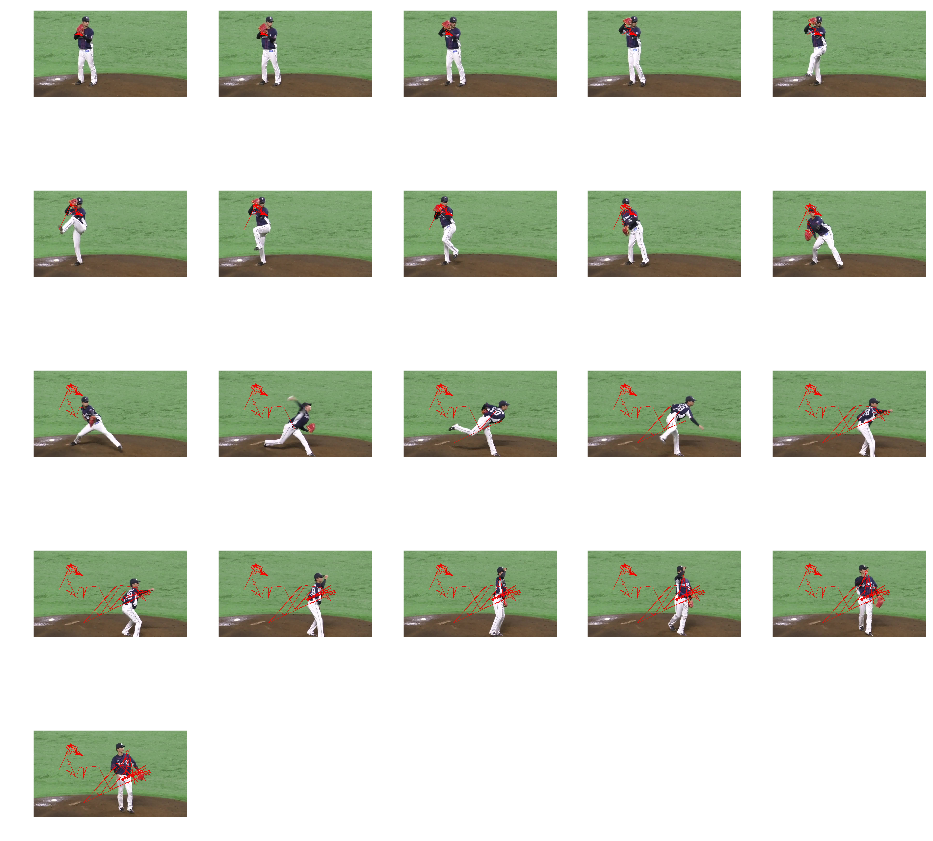

In [21]:
stream = ffmpeg.input(str(MOVIE_OUTPUT_LOCAS_DIR) + "/result.mp4")
imgs_result =checkMoviePerSec(stream, movie_duration)